In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [68]:
df = pd.read_csv('/content/covid19.csv')

df

,Unnamed: 0,Province/State,Country/Region,date,Lat,Long,confirmed,deaths,recoveries
0,0,NaN,Afghanistan,1/22/2020,33.000000,65.000000,0,0,0
1,1,NaN,Albania,1/22/2020,41.153300,20.168300,0,0,0
2,2,NaN,Algeria,1/22/2020,28.033900,1.659600,0,0,0
3,3,NaN,Andorra,1/22/2020,42.506300,1.521800,0,0,0
4,4,NaN,Angola,1/22/2020,-11.202700,17.873900,0,0,0
...,...,...,...,...,...,...,...,...,...
37039,37039,NaN,Sao Tome and Principe,6/16/2020,0.186360,6.613081,671,12,182
37040,37040,NaN,Yemen,6/16/2020,15.552727,48.516388,885,214,91
37041,37041,NaN,Comoros,6/16/2020,-11.645500,43.333300,197,3,127
37042,37042,NaN,Tajikistan,6/16/2020,38.861034,71.276093,5160,50,3624


In [2]:
pop = pd.read_csv('/content/population.csv')

pop

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1438207241,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1377233523,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,330610570,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,272931713,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,219992900,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,4991,0.06%,3,50,100,NaN,N.A.,N.A.,10%,0.00%
231,Falkland Islands,3458,3.05%,103,0,12170,NaN,N.A.,N.A.,66%,0.00%
232,Niue,1624,0.68%,11,6,260,NaN,N.A.,N.A.,46%,0.00%
233,Tokelau,1354,1.27%,17,136,10,NaN,N.A.,N.A.,0%,0.00%


In [11]:
population = pd.read_csv('population.csv').fillna('Not Given').replace('N.A.', 'Not Given')
population.insert(0, 'Index', [i+1 for i in range(population.shape[0])])
display(population)

,Index,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1438207241,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,2,India,1377233523,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,3,United States,330610570,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,4,Indonesia,272931713,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,5,Pakistan,219992900,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4991,0.06%,3,50,100,Not Given,Not Given,Not Given,10%,0.00%
231,232,Falkland Islands,3458,3.05%,103,0,12170,Not Given,Not Given,Not Given,66%,0.00%
232,233,Niue,1624,0.68%,11,6,260,Not Given,Not Given,Not Given,46%,0.00%
233,234,Tokelau,1354,1.27%,17,136,10,Not Given,Not Given,Not Given,0%,0.00%


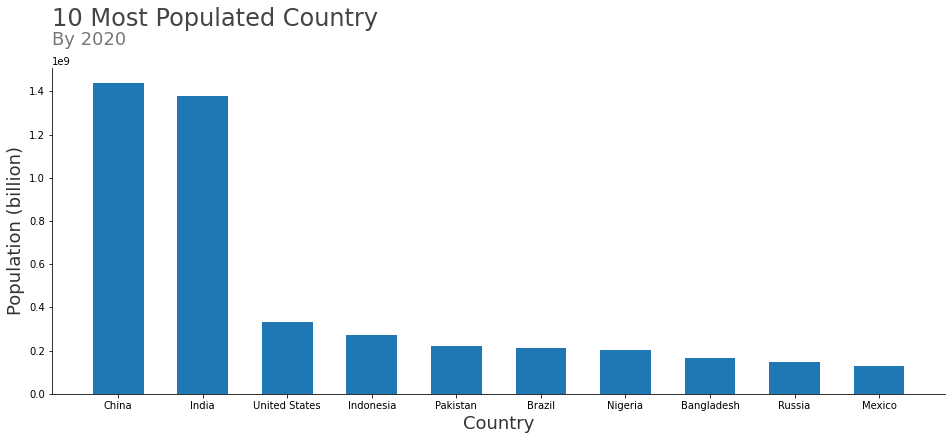

In [42]:
# initialize figure, set size in inches
fig, ax = plt.subplots(figsize=(16,6))

plt.bar(pop['Country (or dependency)'][:10], pop['Population (2020)'][:10], width=0.6)

# customize axes: limit & visibility 
# plt.xlim(0, 200)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set title 
plt.suptitle('10 Most Populated Country', fontsize=24, color='#444444', x=0.125, y=1.02, ha='left')
plt.title('By 2020', fontsize=18, color="#777777", x=0, y=1.05, ha='left')
plt.xlabel('Country', fontsize=18, color='#333333')
plt.ylabel('Population (billion)', fontsize=18, color='#333333')


# show the plot
plt.show()

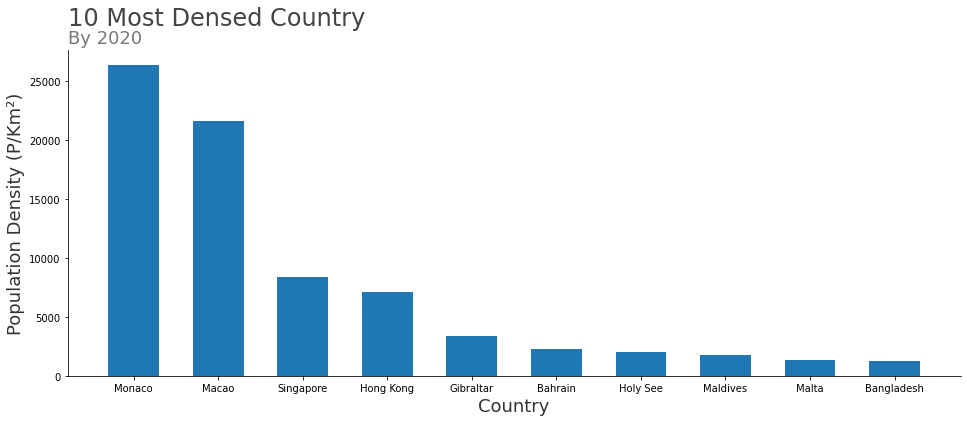

In [52]:
# initialize figure, set size in inches
fig, ax = plt.subplots(figsize=(16,6))

pop_density.sort_values(
    by=['Density (P/Km²)'], inplace=True, ascending=False)

plt.bar(pop_density['Country (or dependency)'][:10],
        pop_density['Density (P/Km²)'][:10], width=0.6)

# customize axes: limit & visibility 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set title 
plt.suptitle('10 Most Densed Country', fontsize=24, color='#444444', x=0.125, ha='left')
plt.title('By 2020', fontsize=18, color="#777777", x=0, ha='left')
plt.xlabel('Country', fontsize=18, color='#333333')
plt.ylabel('Population Density (P/Km²)', fontsize=18, color='#333333')


# show the plot
plt.show()

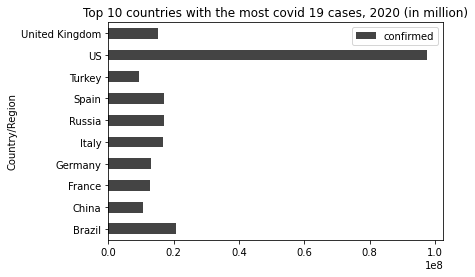

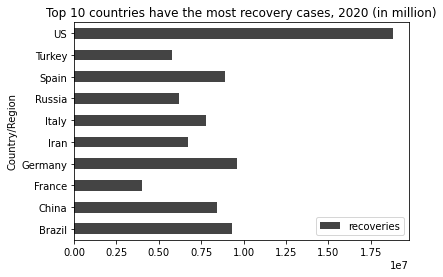

In [95]:


# initialize figure, set size in inches
# fig, ax = plt.subplots(figsize=(16,6))

df_confirmed = df.loc[:,['Country/Region', 'confirmed']].groupby('Country/Region').sum()
df_recoveries = df.loc[:,['Country/Region', 'recoveries']].groupby('Country/Region').sum()
top_cases = df_confirmed.sort_values(by="confirmed", ascending = False)[:10]
top_recoveries = df_recoveries.sort_values(by="recoveries", ascending = False)[:10]

# customize axes: limit & visibility 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set title 
top_cases.groupby(['Country/Region']).sum().plot(kind='barh', y='confirmed',
title='Top 10 countries with the most covid 19 cases, 2020 (in million)', color='#444444')
top_recoveries.groupby(['Country/Region']).sum().plot(kind='barh', y='recoveries',
title='Top 10 countries have the most recovery cases, 2020 (in million)', color='#444444')

# show the plot
plt.show()

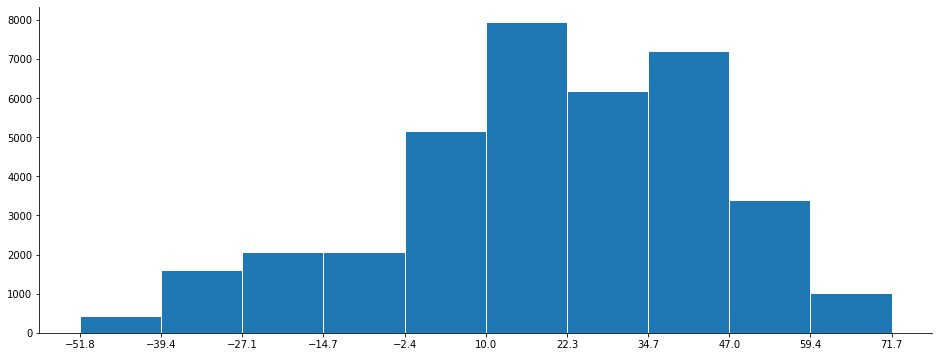

In [91]:
# initialize figure, set size in inches
fig, ax = plt.subplots(figsize=(16, 6))

# histogram: frequency of temperatures
n, bins, edges = plt.hist(df['Lat'], ec='white')
plt.xticks(bins)

# customize axes: limit & visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set title, axis labels & legends


# show the plot
plt.show()

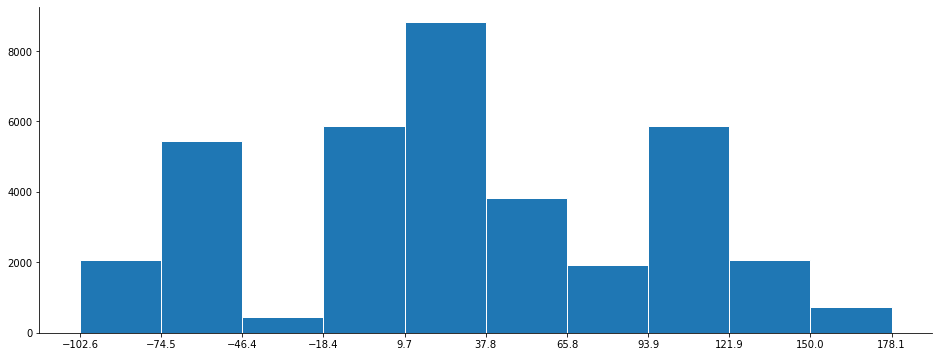

In [90]:
# initialize figure, set size in inches
fig, ax = plt.subplots(figsize=(16, 6))

# histogram: frequency of temperatures
n, bins, edges = plt.hist(df['Long'], ec='white')
plt.xticks(bins)

# customize axes: limit & visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set title, axis labels & legends

# show the plot
plt.show()